## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import sys
import time
import seaborn as sns
import pandas as pd

from tomo_encoders import Patches
from tomo_encoders.misc import viewer
from tomo_encoders import DataFile
import cupy as cp
from tomo_encoders.reconstruction.project import get_projections
from tomo_encoders.reconstruction.recon import recon_binning, recon_patches_3d
from tomo_encoders.misc.voxel_processing import cylindrical_mask, normalize_volume_gpu

In [2]:
fpath_x_rec = '/data02/MyArchive/aisteer_3Dencoders/tmp_data/test_x_rec_4k'
ds_rec = DataFile(fpath_x_rec, tiff = True)


##################################################
Found existing tiff folder: test_x_rec_4k
Dataset shape: (384, 4096, 4096)


In [3]:
Vx_rec = ds_rec.read_full()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

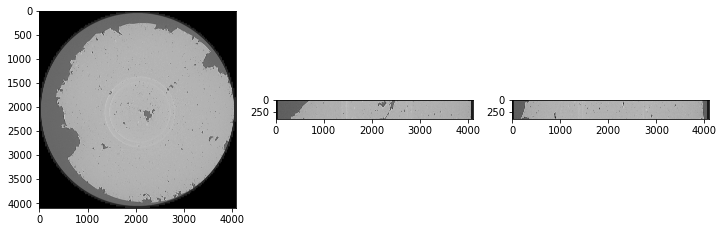

In [4]:
# test
fig, ax = plt.subplots(1,3, figsize = (12,6))
viewer.view_midplanes(Vx_rec, ax = ax)

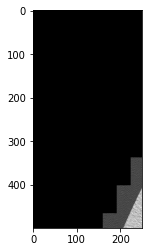

In [5]:
imgs = viewer.get_orthoplanes(vol = Vx_rec)
plt.imshow(imgs[0][750:1250,:250], cmap = 'gray')